# Import needed libraries and load the data

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt #visuals
from sklearn.preprocessing import MinMaxScaler #for normalizing our data
from tensorflow.keras.models import Sequential # creating the model 
from tensorflow.keras.layers import LSTM, Dense #creating the layers in the model
#import required libraries 
df = pd.read_csv('MSFTT.csv')
df.head(1)


,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800


In [2]:
df.info() #looks like we need to convert Date datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9432 entries, 0 to 9431
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9432 non-null   object 
 1   Open       9432 non-null   float64
 2   High       9432 non-null   float64
 3   Low        9432 non-null   float64
 4   Close      9432 non-null   float64
 5   Adj Close  9432 non-null   float64
 6   Volume     9432 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 515.9+ KB


In [3]:
df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800


In [5]:
df['Date'] = pd.to_datetime(df['Date']) #converting df['date']'s data type to datetime 

In [6]:
df['Date'].info() #converted successfully 

<class 'pandas.core.series.Series'>
RangeIndex: 9432 entries, 0 to 9431
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
9432 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 73.8 KB


In [6]:
df.head(10) 

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.059444,58435200
6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.057823,59990400
7,1986-03-24,0.092882,0.092882,0.089410,0.090278,0.056201,65289600
8,1986-03-25,0.090278,0.092014,0.089410,0.092014,0.057282,32083200
9,1986-03-26,0.092014,0.095486,0.091146,0.094618,0.058903,22752000


## Data Analysis and EDA

In [7]:
df.isna().sum().sum(),df.duplicated().sum() #making sure data is clean and concise


(0, 0)

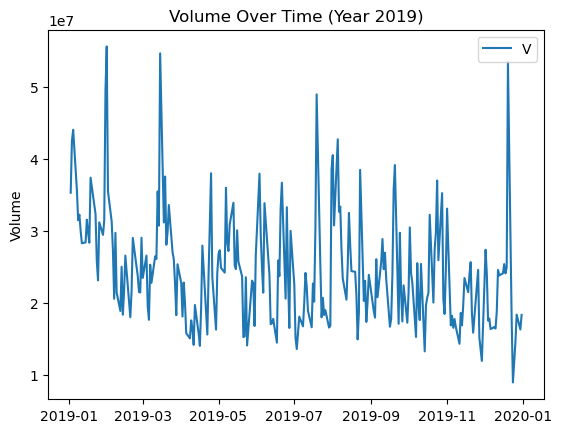

In [8]:
y2019 = df['Date'][(df['Date'] < '2020-01-01') & (df['Date'] > '2019-01-01')]
plt.plot(df['Date'][df['Date'].isin(y2019)],df['Volume'][df['Date'].isin(y2019)]);
plt.title('Volume Over Time (Year 2019)');
plt.ylabel('Volume')
plt.legend('Volume');

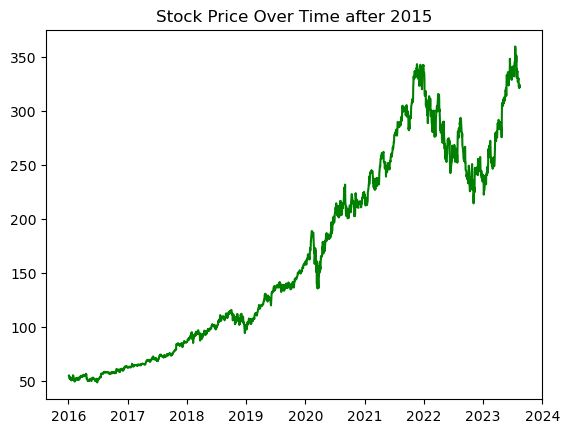

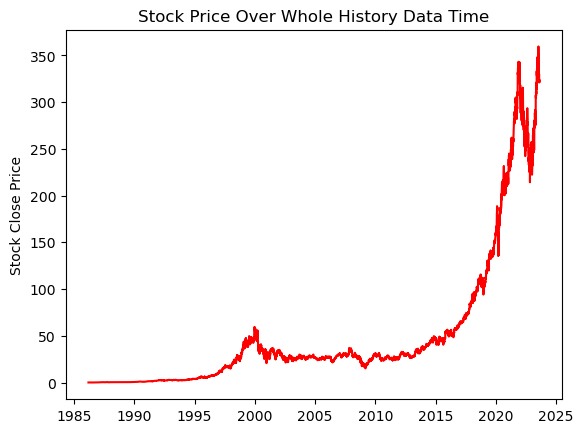

In [9]:
plt.plot(df['Date'][df['Date'].dt.year > 2015],df['Close'][df['Date'].dt.year > 2015],color='g');
plt.title('Stock Price Over Time after 2015');
plt.show()
plt.ylabel('Stock Close Price');
plt.plot(df['Date'],df['Close'],color='r');
plt.title('Stock Price Over Whole History Data Time');
plt.ylabel('Stock Close Price');
plt.show()


### We can see here that there is a big jump from the year 2015 up untill the peak at 2022

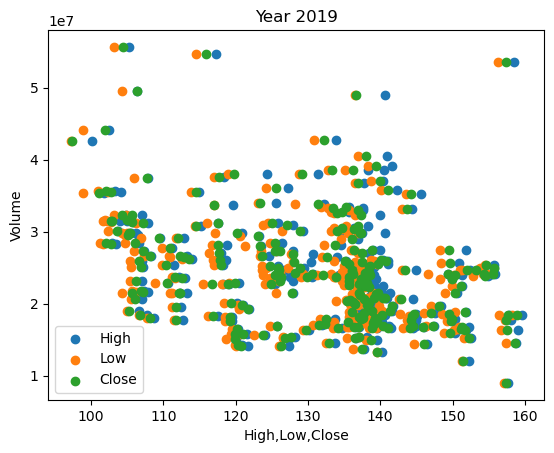

In [10]:
plt.scatter(df['High'][df['Date'].isin(y2019)],df['Volume'][df['Date'].isin(y2019)]);
plt.scatter(df['Low'][df['Date'].isin(y2019)],df['Volume'][df['Date'].isin(y2019)]);
plt.scatter(df['Close'][df['Date'].isin(y2019)],df['Volume'][df['Date'].isin(y2019)]);
plt.legend(['High','Low','Close'])
plt.title('Year 2019')
plt.xlabel('High,Low,Close')
plt.ylabel('Volume')
plt.show()


### We can see here that there is no relation between the stock states and the number of transactions or the Volume column So we wouldn't choose the Volume in our features to feed our model

# Modeling and Feature Engingeering 

In [11]:
df['Date'].sort_values(ascending=True).head(10)

0   1986-03-13
1   1986-03-14
2   1986-03-17
3   1986-03-18
4   1986-03-19
5   1986-03-20
6   1986-03-21
7   1986-03-24
8   1986-03-25
9   1986-03-26
Name: Date, dtype: datetime64[ns]

## we can see that there are missing dates jumping from day 14 to day 17 so we better use the Date as the index to better manipulate the data

In [11]:
df.set_index('Date',inplace=True)

In [12]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
1986-03-20,0.098090,0.098090,0.094618,0.095486,0.059444,58435200
1986-03-21,0.095486,0.097222,0.091146,0.092882,0.057823,59990400
1986-03-24,0.092882,0.092882,0.089410,0.090278,0.056201,65289600
1986-03-25,0.090278,0.092014,0.089410,0.092014,0.057282,32083200


In [13]:
df=df.drop(axis=0,columns=['Volume','Adj Close']) #here we're dropping Volume as we metioned above it has no benefit to our model
#and dropping adj close as it's the same as the close column so we're removing it 

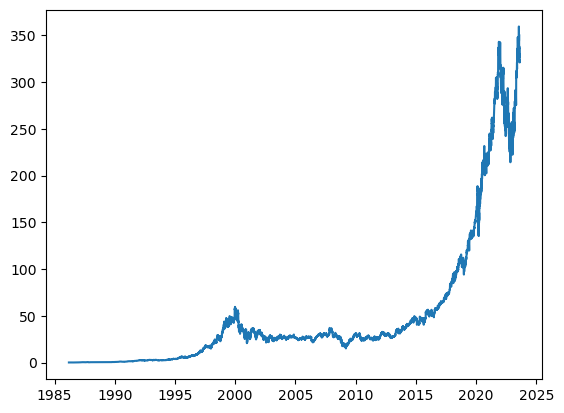

In [14]:
plt.plot(df.index,df.Close);

## If we look at the graph we can see that the pattern is from 1985 to 2014/15 is not changing drastically so we need to make sure to choose the right data for our training,validation,test

In [15]:
df = df[df.index > '2015-1-1']

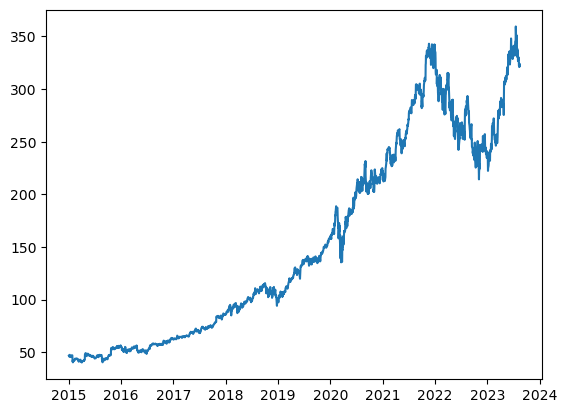

In [16]:
plt.plot(df.index,df['Close']);

### looks good

In [21]:
df


,Open,High,Low,Close
Date,,,,
2015-01-02,46.660000,47.419998,46.540001,46.759998
2015-01-05,46.369999,46.730000,46.250000,46.330002
2015-01-06,46.380001,46.750000,45.540001,45.650002
2015-01-07,45.980000,46.459999,45.490002,46.230000
2015-01-08,46.750000,47.750000,46.720001,47.590000
...,...,...,...,...
2023-08-09,326.470001,327.109985,321.049988,322.230011
2023-08-10,326.019989,328.260010,321.179993,322.929993
2023-08-11,320.260010,322.410004,319.209991,321.010010


In [17]:
data = df[['Close']].values

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

# Define window size for sequence data, so we're using 10 previous data points of close column as features to predict the 
#target datapoint
window_size = 10

# Prepare sequences(input featrues) and labels(Target)
sequences = []
labels = []

for i in range(window_size, len(data_normalized)):
    sequences.append(data_normalized[i - window_size:i])
    labels.append(data_normalized[i])

X = np.array(sequences)
y = np.array(labels)

split_ratio = 0.8
split_index = int(split_ratio * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [18]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))
#return_sequences=True we return a sequence because 
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate on the test set
test_loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)
predictions_denormalized = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test)

Epoch 1/50
54/54 [==============================] - 4s 7ms/step - loss: 0.0168
Epoch 2/50
54/54 [==============================] - 0s 7ms/step - loss: 2.4825e-04
Epoch 3/50
54/54 [==============================] - 0s 7ms/step - loss: 1.9949e-04
Epoch 4/50
54/54 [==============================] - 0s 7ms/step - loss: 1.9205e-04
Epoch 5/50
54/54 [==============================] - 0s 7ms/step - loss: 1.8998e-04
Epoch 6/50
54/54 [==============================] - 0s 7ms/step - loss: 1.8345e-04
Epoch 7/50
54/54 [==============================] - 0s 7ms/step - loss: 1.7976e-04
Epoch 8/50
54/54 [==============================] - 0s 7ms/step - loss: 1.8561e-04
Epoch 9/50
54/54 [==============================] - 0s 7ms/step - loss: 1.9937e-04
Epoch 10/50
54/54 [==============================] - 0s 7ms/step - loss: 1.8560e-04
Epoch 11/50
54/54 [==============================] - 0s 7ms/step - loss: 1.9113e-04
Epoch 12/50
54/54 [==============================] - 0s 7ms/step - loss: 1.9791e-04
Epoch

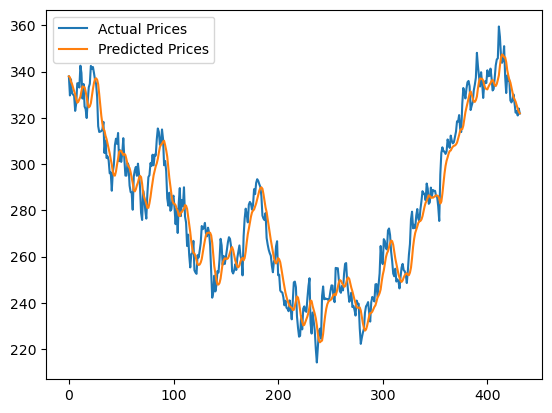

In [19]:
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predictions_denormalized, label='Predicted Prices')
plt.legend()
plt.show()